In [1]:
%matplotlib inline
from matplotlib.pyplot import imshow
import imagehash as ihs
from PIL import Image

In [2]:
def calculate_distance(img_1, img_2):
    phash_1 = ihs.phash(img_1, hash_size=16)
    phash_2 = ihs.phash(img_2, hash_size=16)
    print 'phash_1', phash_1
    print 'phash_2', phash_2
    len(str(phash_1))
    return hamming(str(phash_1), str(phash_2))

In [3]:
img_1 = Image.open('Img_01_1.jpg') ## https://www.vivareal.com.br/imovel/lote-terreno-vila-metalurgica-bairros-santo-andre-182350m2-venda-RS218500000-id-69183412/
img_2 = Image.open('Img_02_2.jpg') ## https://www.vivareal.com.br/imovel/lote-terreno-vila-metalurgica-bairros-santo-andre-182350m2-venda-RS218500000-id-68750026/

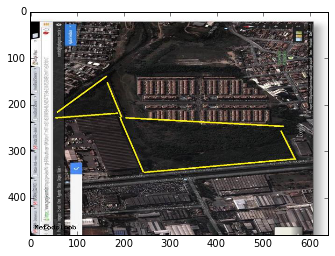

In [4]:
imshow(img_1)

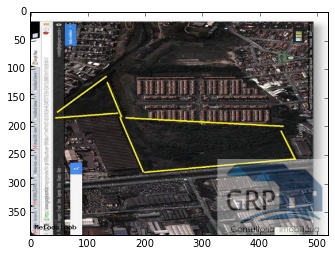

In [5]:
imshow(img_2)

-------------------------------------------------

As diferenças entre as imagens acima:
 - Pertencem a dois anúncios diferentes
 - As resoluções são diferentes
 - O nível de qualidade das imagens é diferente (a debaixo possui qualidade ligeiramente pior)
 - A imagem 2 possui um logo de outra imobiliária

### Cálculo das image hashes

In [6]:
phash_1 = ihs.phash(img_1, hash_size=8)
phash_2 = ihs.phash(img_2, hash_size=8)

In [7]:
print 'phash_1', phash_1
print 'phash_2', phash_2

phash_1 7fe10543b149b1cd
phash_2 7ff309439149b18b


In [8]:
#Comprimento das hashes
len(str(phash_1))

16

In [9]:
#Distância entre as hashes:
import itertools

def hamming(str1, str2):
    return sum(itertools.imap(str.__ne__, str1, str2))

In [10]:
hamming(str(phash_1), str(phash_2))

6

Usando hash de 16 bits

In [11]:
calculate_distance(img_1, img_2)

phash_1 7f55e10101fa4300a12249a0a116cda88b3fc9afb3daebafa99367acb16be7ac
phash_2 7f55f30109fa4300b12049a0b102ab2c09bbc9aab3daebafa9b36badb36aadea


26

### Outro caso

In [12]:
img_1 = Image.open('Img_03_1.jpg')
img_2 = Image.open('Img_03_2.jpg')

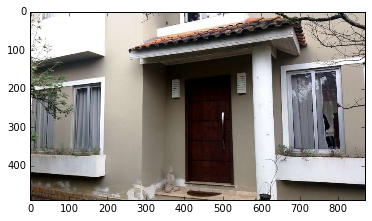

In [13]:
imshow(img_1)

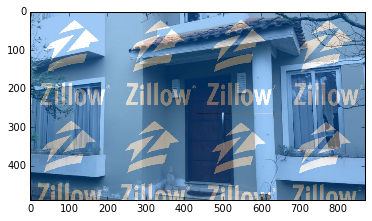

In [14]:
imshow(img_2)

Neste caso, as imagens-base são idênticas. Na segunda foto, foi colocada uma marca d'água que abrange a imagem inteira, a título de testar a robusteza do hash

In [15]:
calculate_distance(img_1, img_2)

phash_1 47d397d1b32c3b2c5b2c0df4c8d1c5dfd8c6f8c18f244a580d3c48d9e4f46d52
phash_2 47d297d9b32c3b2e5bbd0d51c8d1c455d9d4f9c08f044ad90d7c485965d46f52


24

### Comparação de duas imagens bem diferentes

In [16]:
img_1 = Image.open('Img_01_1.jpg')
img_2 = Image.open('Img_03_1.jpg')

In [17]:
calculate_distance(img_1, img_2)

phash_1 7f55e10101fa4300a12249a0a116cda88b3fc9afb3daebafa99367acb16be7ac
phash_2 47d397d1b32c3b2c5b2c0df4c8d1c5dfd8c6f8c18f244a580d3c48d9e4f46d52


61